Lets start with importing the new `Class`/`function`:

In [35]:
from pliers.extractors import MFCCEnergyExtractor

In [36]:
from pliers.stimuli import AudioStim

In [37]:
punk = 'Punk1.wav'

In [38]:
stim = AudioStim(punk)

In [39]:
stim.get_sampling_rate(punk)

44100

We set up two extractors, one for `timbre` and one for `pitch`:

In [40]:
timbre_extractor = MFCCEnergyExtractor(direction='low')
pitch_extractor = MFCCEnergyExtractor(direction='high')

We'll have a look at the respective outputs:

In [41]:
timbre_punk = timbre_extractor.transform(punk)
pitch_punk = pitch_extractor.transform(punk)

In [42]:
timbre_punk.data.shape

(517, 132)

In [43]:
pitch_punk.data

,order,duration,onset,object_id,mfcc_energy_0,mfcc_energy_1,mfcc_energy_2,mfcc_energy_3,mfcc_energy_4,mfcc_energy_5,...,mfcc_energy_118,mfcc_energy_119,mfcc_energy_120,mfcc_energy_121,mfcc_energy_122,mfcc_energy_123,mfcc_energy_124,mfcc_energy_125,mfcc_energy_126,mfcc_energy_127
0,0,0.01161,0.000000,0,0.225841,0.367230,0.802976,1.821090,3.395338,4.232799,...,0.599378,0.268403,0.245604,0.419605,0.800842,1.121953,1.176289,1.247578,1.571726,1.997088
1,1,0.01161,0.011610,0,0.091518,0.280676,1.227502,3.236435,3.848622,2.838875,...,0.491466,0.164397,0.130806,0.235191,0.558888,1.063696,1.467892,1.805471,2.311368,2.837840
2,2,0.01161,0.023220,0,0.081948,0.240122,1.076738,3.364474,5.013275,4.084390,...,0.450901,0.109871,0.069776,0.122844,0.359052,0.960277,1.807628,2.602783,3.342704,3.908900
3,3,0.01161,0.034830,0,0.477701,0.996434,2.061005,2.077284,1.062799,0.552487,...,0.452502,0.096149,0.054274,0.095516,0.310421,0.944692,1.943864,2.932610,3.877157,4.620651
4,4,0.01161,0.046440,0,0.654147,1.591244,3.744070,3.312208,1.044396,0.283829,...,0.475022,0.099774,0.056048,0.097627,0.310927,0.923504,1.862477,2.774715,3.644061,4.330077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,512,0.01161,5.944308,0,0.146883,0.349484,1.101829,2.341355,2.602109,1.927109,...,0.228192,0.095700,0.120875,0.325821,0.850188,1.303127,1.368787,1.582822,2.428994,3.665283
513,513,0.01161,5.955918,0,0.069263,0.269780,1.457922,3.533767,2.903578,1.529455,...,0.215306,0.073237,0.080980,0.217558,0.648696,1.233953,1.585437,2.040012,3.149425,4.610356
514,514,0.01161,5.967528,0,0.209181,0.546673,1.690256,2.606809,1.664554,0.779282,...,0.164835,0.051570,0.056730,0.164033,0.559781,1.246351,1.819789,2.490398,3.845897,5.520597
515,515,0.01161,5.979138,0,0.925678,1.636527,2.666024,2.107401,0.827973,0.320691,...,0.154536,0.047850,0.055439,0.176958,0.638622,1.357066,1.785094,2.297060,3.632450,5.489788


KK, visualizing things might also be helpful.

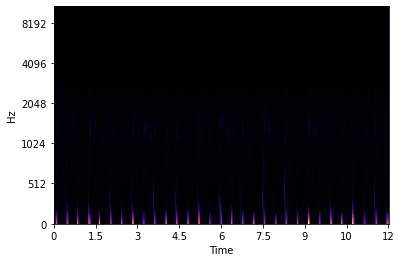

In [44]:
from librosa import display
display.specshow(timbre_punk.data.iloc[:, 4:].T.to_numpy(), y_axis='mel', x_axis='time')

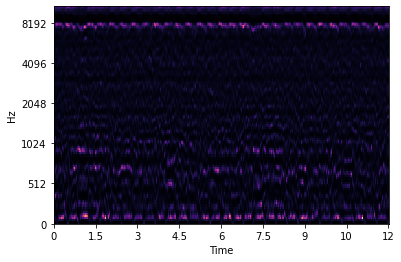

In [45]:
display.specshow(pitch_punk.data.iloc[:, 4:].T.to_numpy(), y_axis='mel', x_axis='time')

Now we'll compare that to the output of the function Peer used so far:

In [46]:
# define dct-function like Hanke et al. for timbre, pitch and spectrum
def dct_II(N):
    # Create N x N matrix of discrete cosine transform coefficients
    # Uses DCT-II formula:https://en.wikipedia.org/wiki/Discrete_cosine_transform#DCT-II
    d = np.array([np.cos(np.pi / N * (np.arange(N) + 0.5) * k)
                  for k in np.arange(N)],
                 dtype='f4')
    d[0] *= 1 / np.sqrt(2)
    d *= np.sqrt(2.0 / N)
    return d

In [47]:
from librosa import load, feature
import numpy as np
y, sr = load(punk, sr=None)
nBands = 48
nCoefs = 13
mfs = feature.melspectrogram(y=y, sr=sr, n_mels=48)
mfcc = np.dot(DCT, 20 * np.log10(mfs + np.finfo(float).eps))

In [48]:
# timbre 
DCT = dct_II(nBands)
lq_mfs = np.dot(DCT[:nCoefs].T, mfcc[:nCoefs])
lq_mfs_norm = 10 ** (lq_mfs / 20.)

In [49]:
lq_mfs

array([[  23.418068,   25.954815,   26.186455, ...,   36.878727,
          41.06066 ,   37.33686 ],
       [  19.483458,   25.173761,   25.810421, ...,   33.31904 ,
          35.475357,   31.180565],
       [  13.142012,   23.44126 ,   24.72218 , ...,   26.854645,
          25.934   ,   20.878624],
       ...,
       [ -77.28765 ,  -83.56362 , -101.66936 , ..., -102.91837 ,
        -101.57619 ,  -77.55679 ],
       [ -88.0054  ,  -99.30786 , -127.95965 , ..., -130.42311 ,
        -128.34267 ,  -92.47256 ],
       [ -94.19185 , -108.59271 , -143.53215 , ..., -146.76175 ,
        -144.18904 , -101.20898 ]], dtype=float32)

In [50]:
lq_mfs.shape

(48, 517)

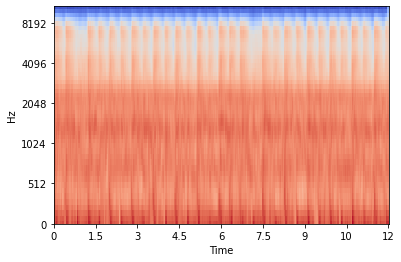

In [51]:
# visualize timbre
display.specshow(lq_mfs, y_axis='mel', x_axis='time')

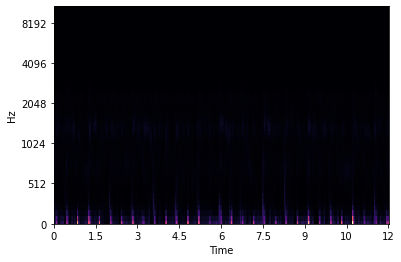

In [52]:
# Normalized LQ MFS using Hanke implementation

display.specshow(lq_mfs_norm, y_axis='mel', x_axis='time')

In [53]:
lq_mfs_norm_pliers = timbre_punk.data.iloc[:, 4:].T.to_numpy()

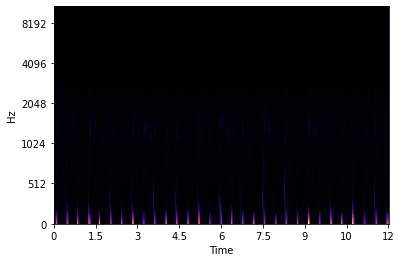

In [54]:
# Normalized LQ MFS using pliers / librosa implementation

display.specshow(lq_mfs_norm_pliers, y_axis='mel', x_axis='time')

In [55]:
# pitch
mfs = feature.melspectrogram(y=y, sr=sr, n_mels=48)
DCT = dct_II(nBands)
mfcc = np.dot(DCT, 20 * np.log10(mfs + np.finfo(float).eps))
hq_mfs = np.dot(DCT[nCoefs:].T, mfcc[nCoefs:])
hq_mfs_norm = 10 ** (hq_mfs / 20.)

In [56]:
hq_mfs.shape

(48, 517)

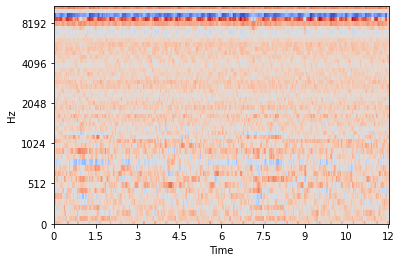

In [57]:
# visualize pitch
display.specshow(hq_mfs, y_axis='mel', x_axis='time')

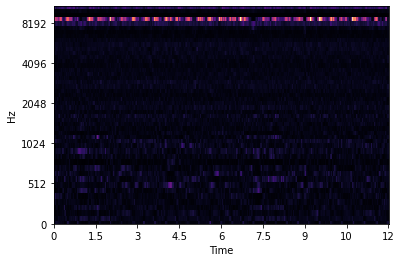

In [58]:
# Normalized HQ MFS using Hanke's code
display.specshow(hq_mfs_norm, y_axis='mel', x_axis='time')

In [59]:
hq_mfs_norm_pliers = pitch_punk.data.iloc[:, 4:].T.to_numpy()

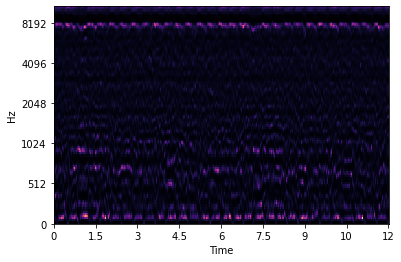

In [60]:
# Normalized HQ MFS using pliers / librosa implementation
display.specshow(hq_mfs_norm_pliers, y_axis='mel', x_axis='time')